## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_data_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
duplicates_df = combined_data_df[duplicates]
duplicates_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouseg989 = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989", :]
mouseg989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df[~combined_data_df["Mouse ID"].isin(['g989'])].reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df["Mouse ID"].nunique()
num_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_df = clean_df.groupby("Drug Regimen")
mean = round(regimen_df["Tumor Volume (mm3)"].mean(),2)
median = round(regimen_df["Tumor Volume (mm3)"].median(),2)
var = round(regimen_df["Tumor Volume (mm3)"].var(),2)
std = round(regimen_df["Tumor Volume (mm3)"].std(),2)
sem = round(regimen_df["Tumor Volume (mm3)"].sem(),2)

# Assemble the resulting series into a single summary dataframe.
regimen_summary_df = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":var,
    "Std. Dev.":std,
    "SEM":sem,
})
#print("Tumor Volume (mm3) Summary Table by Drug Regimen")
regimen_summary_df
regimen_summary_df.style.set_caption("Tumor Volume (mm3) Summary Table by Drug Regimen")
regimen_summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_df = regimen_df.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
agg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

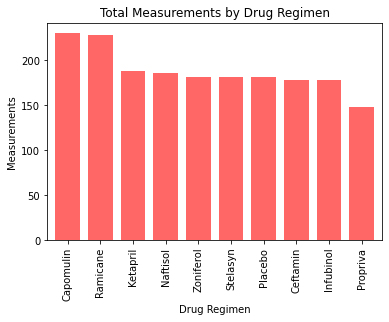

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimens = clean_df["Drug Regimen"].value_counts()
total_meas_chart = drug_regimens.plot(kind="bar", title="Total Measurements by Drug Regimen", color="red", alpha=0.6, width=0.75)
total_meas_chart.set_ylabel("Measurements")
total_meas_chart.set_xlabel("Drug Regimen")

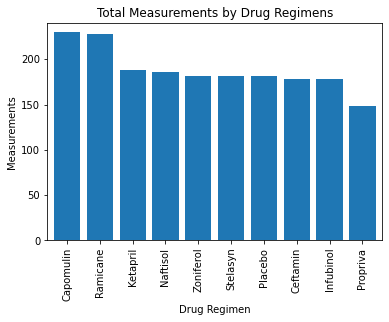

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug_regimens = clean_df["Drug Regimen"].value_counts()
labels = drug_regimens.index.values
y_values = drug_regimens.values
x_axis = np.arange(len(drug_regimens))
tick_locations = [regimen for regimen in x_axis]
plt.xticks(tick_locations, labels, rotation=90)
plt.bar(x_axis, y_values)
plt.title('Total Measurements by Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')
plt.ylim(0, max(drug_regimens)+10)
plt.xlim(-0.6, len(x_axis) - 0.4)
plt.show()

# x_axis = np.arange(len(drug_regimens))
# plt.bar(x_axis, total_measures, width=0.5)
# tick_locations = [regimen for regimen in x_axis]


(-1.1356057685416756,
 1.1094107411880136,
 -1.1074976175494935,
 1.1003570294071188)

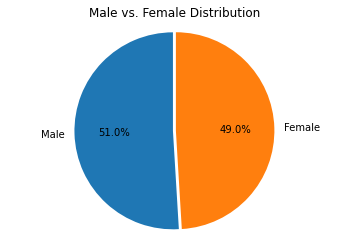

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df["Sex"].value_counts()
explode = (0.03, 0)
gender_chart = gender.plot(kind="pie", title = 'Male vs. Female Distribution', label="", startangle=90, labeldistance=1.1, explode = explode, autopct="%1.1f%%")
gender_chart.axis("equal")

Text(0.5, 1.0, 'Male vs Female Distribution')

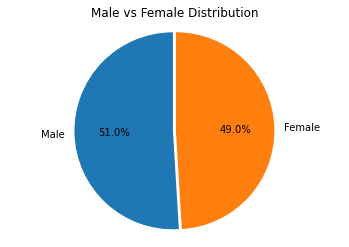

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
sizes=gender
plt.pie(gender, explode=explode, labels=labels, startangle=90, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Male vs Female Distribution")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby('Mouse ID')
mouse_by_max_df = mouse_group.max()
greatest_timepoint = pd.DataFrame(mouse_by_max_df['Timepoint'])
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(clean_df, greatest_timepoint, how='right', on=["Mouse ID", "Timepoint"])
last_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_timepoint_df.loc[last_timepoint_df['Drug Regimen']== drug, "Tumor Volume (mm3)" ]

                                     
    # add subset 
    
    tumor_vol_list.append(tumor_vol)
    # Determine outliers using upper and lower bounds

    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    tumor_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"The potential outlier for {drug}, is {tumor_outliers}")
    

The potential outlier for Capomulin, is Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outlier for Ramicane, is Series([], Name: Tumor Volume (mm3), dtype: float64)
The potential outlier for Infubinol, is 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
The potential outlier for Ceftamin, is Series([], Name: Tumor Volume (mm3), dtype: float64)


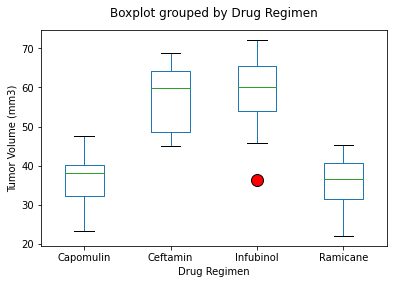

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_df = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"].isin(treatments).reset_index(drop=True)]
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=12)
boxplot = four_df.boxplot(column=["Tumor Volume (mm3)"], by="Drug Regimen", grid=False, flierprops=flierprops)
boxplot.set_title('')
boxplot.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (Days)')

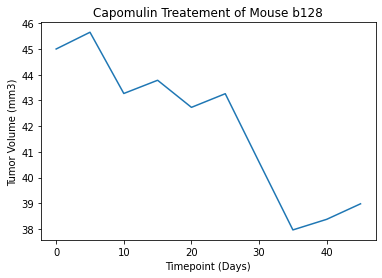

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]

#Group by mouse to find mouse ID to pick
capomulin_group_by_mouse = capomulin_df.groupby("Mouse ID")

#Create dataframe for mouse and create line plot
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128", :]
line_plot = mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", legend=False)

#Clean up chart
plt.title("Capomulin Treatement of Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")

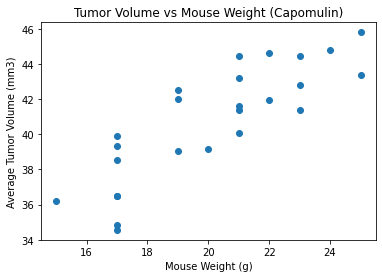

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tum_vol = capomulin_group_by_mouse["Tumor Volume (mm3)"].mean()
weight = capomulin_group_by_mouse["Weight (g)"].mean()
scatter_plot = plt.scatter(weight, avg_tum_vol)
plt.title('Tumor Volume vs Mouse Weight (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

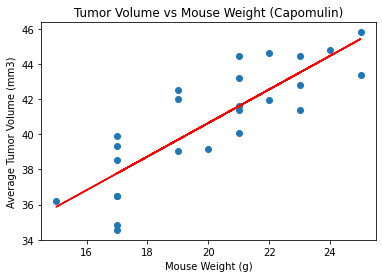

The correlation between mouse weight and tumor volume is 0.84.
0.8419363424694718


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tum_vol)
regress_values = weight * slope + intercept
plt.scatter(weight, avg_tum_vol)
plt.plot(weight, regress_values, color="red")
plt.title('Tumor Volume vs Mouse Weight (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

corr_coeff = st.pearsonr(weight, avg_tum_vol)
print(f"The correlation between mouse weight and tumor volume is {round(corr_coeff[0],2)}.")